# COGS 108 - Data Checkpoint

# Names

- Frans Timothy Juacalla
- Clarissa Elbo
- Ning Chen
- Marco Morocho

<a id='research_question'></a>
# Research Question

**What features or attributes primarily affect the ranking of a university compared to other universities? For instance, how do factors such as location and cost of attendance contribute to the ranking? Are university rankings racially biased? Do less racially diverse universities rank better than diverse ones?**

# Dataset(s)

- Dataset Name: America's Top College Rankings 2019 (Forbes)
- Link to the dataset: https://www.kaggle.com/chris95cam/forbes-americas-top-colleges-2019
- Number of observations: 650


This dataset contains the ranking of 650 colleges in the United States and other information about each college, including location, student population, total annual cost, etc.


- Dataset Name: College Admissions
- Link to the dataset: https://www.kaggle.com/samsonqian/college-admissions
- Number of observations: 1517


This dataset consists of information about 1517 colleges, including their number of applicants, student enrollment, distribution of student population based on gender and ethnicity, and standardized test scores.


The college admissions dataset will be merged with the college rankings. In particular, we plan on choosing the columns that fit our analysis. To  combine them, we plan on using df.merge(..., how = ‘inner’), getting columns from our primary, and matching columns from the second. 


# Setup

In [1]:
## import libraries, modules, etc
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

The 2019 ranking dataset is stored in **ranking** and the college admissions dataset is stored in the variable **admissions**.

The ranking dataset is inner merged with the admissions dataset, which yielded 442 observations. We created an inner merge since we needed both the ranking data and the admissions data, with the ranking data obviously having more importance. This however resulted in a smaller dataset compared to the 650 observations that the ranking dataset originally had. Regardless, we still have more than enough observations to work with.

In [2]:
admissions = pd.read_csv('college_admissions.csv') # college admission dataset
ranking = pd.read_csv('rankings.csv') # 2019 ranking dataset

In [3]:
admissions.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [4]:
ranking.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [5]:
df = ranking.merge(admissions, on='Name', how='inner') # left merge to mainting all rankings 
df = df.drop_duplicates(subset=['Name']) # two duplicates resulting from admissions dataset join

Since the resulting merge resulted in 124 columns, it was essential to remove the columns that are irrelevant or redundant. Our group determined and decided to keep the columns that are relating to test scores, racial demographics (proportions of each ethnicity/race) , geographical locations, financial data, and admissions related data. Our group ended up with 37 columns to work with.



In [6]:
bool_arr = ['total' in i.lower() for i in df.columns] # columns with total are included 
bool_arr[0:16] = [True] * 16 # first 16 columns included 

used_cols = df.loc[:, bool_arr] # the dataframe potentially to be used, should be reduced further
final = (
    used_cols
    .drop(columns = [used_cols.columns[10]] 
          + used_cols.columns[18:20].tolist() 
          + used_cols.columns[25:27].tolist())
) ## 37 columns are kept


With the code below, we cleaned the data types for each column. We found that most columns are of the proper data type and that the only one that needed changing was the College Ranking itself. As such, we change its type from float to integer. 

With the info() function call below, we could see how much missingness is in our combined dataset. We found that our dataset didn't have much missing observations, with the exception of SAT and ACT scores. We plan on imputating these columns in the future, after we have determined the type of missingness the aforementioned columns have.


In [7]:
final.loc[:, 'Rank'] = used_cols['Rank'].astype(int)  # change the Rank type to int

final.info()
# remove, impute missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 443
Data columns (total 37 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Rank                                                                            442 non-null    int32  
 1   Name                                                                            442 non-null    object 
 2   City                                                                            442 non-null    object 
 3   State                                                                           442 non-null    object 
 4   Public/Private                                                                  442 non-null    object 
 5   Undergraduate Population                                                        442 non-null    float64
 6   Student Population

Finally, our group checked the dataset for any weird or unusual values. We found that the dataset didn't contain any such thing as seen below. For instance, columns regarding demographic percentages had reasonable values, with observations lying between the range of 0 to 100, as percentages should be. Therefore, there was no need for any tranformations or changes to the data.

In [8]:
pd.set_option('display.max_columns', None) # Just displays all the columns

final.describe() # judging by the summary stats below, there's no need to modify values

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Applicants total,Admissions total,"Estimated undergraduate enrollment, total","Estimated freshman undergraduate enrollment, total","Estimated graduate enrollment, total",Percent admitted - total,Admissions yield - total,Total enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,441.000000,366.000000,366.000000,373.000000,373.000000,438.000000,438.000000,441.000000,441.000000,420.000000,438.000000,438.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,326.873303,8053.357466,9858.445701,23818.776018,22255.036199,52312.180995,61.668934,1116.286885,1312.035519,23.493298,28.568365,9070.342466,4765.630137,6958.643991,1334.560091,2457.600000,59.931507,29.817352,9349.775510,0.335601,4.809524,7.392290,7.512472,0.045351,65.068027,2.859410,5.460317,6.315193,4.947846,55.621315,54.501134,65.988662,68.585034
std,190.313948,9884.598752,11691.904106,7466.094362,11466.512458,12758.513604,22.660221,134.661574,117.100572,3.863683,3.008727,9227.790209,4637.068765,8024.307207,1346.563738,3696.199917,20.736438,12.916506,10748.373745,1.211996,4.603852,9.606477,6.176234,0.208310,15.704223,1.670114,5.694007,6.007417,4.651930,12.949180,21.359810,16.215239,14.506195
min,1.000000,185.000000,390.000000,1298.000000,3597.000000,8646.000000,5.000000,870.000000,1080.000000,15.000000,22.000000,232.000000,176.000000,271.000000,47.000000,0.000000,6.000000,8.000000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,32.000000
25%,164.250000,1864.250000,2118.500000,18501.000000,10641.000000,42020.250000,49.000000,1020.000000,1230.000000,21.000000,26.000000,3057.000000,1740.250000,1820.000000,453.000000,100.000000,48.250000,20.000000,2061.000000,0.000000,2.000000,3.000000,4.000000,0.000000,56.000000,2.000000,2.000000,2.000000,2.000000,51.000000,40.000000,56.000000,58.000000
50%,326.500000,3618.000000,4501.000000,23657.500000,22449.000000,53267.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000,5526.500000,3056.500000,3241.000000,756.000000,1056.000000,64.000000,27.000000,4537.000000,0.000000,3.000000,5.000000,6.000000,0.000000,68.000000,3.000000,4.000000,5.000000,3.000000,56.000000,56.000000,66.000000,68.000000
75%,486.750000,10202.000000,13834.250000,29014.250000,29622.250000,63422.000000,79.000000,1188.750000,1380.000000,25.000000,30.000000,11499.750000,6218.750000,9182.000000,1674.000000,3434.250000,74.000000,36.750000,12757.000000,0.000000,6.000000,8.000000,9.000000,0.000000,77.000000,4.000000,7.000000,8.000000,6.000000,60.000000,70.000000,79.000000,79.000000
max,650.000000,65100.000000,75044.000000,43965.000000,50897.000000,75735.000000,98.000000,1530.000000,1590.000000,34.000000,35.000000,57845.000000,35815.000000,51269.000000,8061.000000,30599.000000,100.000000,91.000000,77338.000000,22.000000,32.000000,96.000000,62.000000,1.000000,92.000000,9.000000,42.000000,46.000000,33

With data cleaning done, the dataset we ended up with has a shape of 442 rows and 37 columns

In [9]:
final.shape

(442, 37)

In [10]:
final.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Applicants total,Admissions total,"Estimated undergraduate enrollment, total","Estimated freshman undergraduate enrollment, total","Estimated graduate enrollment, total",Percent admitted - total,Admissions yield - total,Total enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,1,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,5.0,1460.0,1590.0,32.0,35.0,35023.0,2047.0,10542.0,1659.0,18233.0,6.0,81.0,28297.0,0.0,13.0,5.0,7.0,0.0,45.0,3.0,5.0,21.0,13.0,49.0,87.0,95.0,97.0
1,2,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,5.0,1390.0,1540.0,32.0,35.0,38828.0,2208.0,7061.0,1674.0,11156.0,6.0,76.0,18346.0,0.0,15.0,4.0,10.0,0.0,38.0,6.0,6.0,20.0,15.0,43.0,76.0,92.0,96.0
2,3,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,7.0,1460.0,1580.0,32.0,35.0,28977.0,2043.0,5310.0,1300.0,6650.0,7.0,66.0,12109.0,0.0,13.0,5.0,7.0,0.0,48.0,4.0,3.0,18.0,13.0,49.0,90.0,96.0,98.0
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,7.0,1490.0,1570.0,33.0,35.0,18989.0,1548.0,4528.0,1115.0,6773.0,8.0,72.0,11301.0,0.0,16.0,3.0,9.0,0.0,34.0,3.0,5.0,29.0,16.0,37.0,84.0,91.0,93.0
4,5,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,6.0,1430.0,1570.0,31.0,35.0,26499.0,1963.0,5248.0,1284.0,2714.0,7.0,65.0,8014.0,0.0,15.0,6.0,7.0,0.0,45.0,4.0,4.0,20.0,15.0,45.0,88.0,95.0,97.0


***

In [11]:
final

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Applicants total,Admissions total,"Estimated undergraduate enrollment, total","Estimated freshman undergraduate enrollment, total","Estimated graduate enrollment, total",Percent admitted - total,Admissions yield - total,Total enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,1,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,5.0,1460.0,1590.0,32.0,35.0,35023.0,2047.0,10542.0,1659.0,18233.0,6.0,81.0,28297.0,0.0,13.0,5.0,7.0,0.0,45.0,3.0,5.0,21.0,13.0,49.0,87.0,95.0,97.0
1,2,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,5.0,1390.0,1540.0,32.0,35.0,38828.0,2208.0,7061.0,1674.0,11156.0,6.0,76.0,18346.0,0.0,15.0,4.0,10.0,0.0,38.0,6.0,6.0,20.0,15.0,43.0,76.0,92.0,96.0
2,3,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,7.0,1460.0,1580.0,32.0,35.0,28977.0,2043.0,5310.0,1300.0,6650.0,7.0,66.0,12109.0,0.0,13.0,5.0,7.0,0.0,48.0,4.0,3.0,18.0,13.0,49.0,90.0,96.0,98.0
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,7.0,1490.0,1570.0,33.0,35.0,18989.0,1548.0,4528.0,1115.0,6773.0,8.0,72.0,11301.0,0.0,16.0,3.0,9.0,0.0,34.0,3.0,5.0,29.0,16.0,37.0,84.0,91.0,93.0
4,5,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,6.0,1430.0,1570.0,31.0,35.0,26499.0,1963.0,5248.0,1284.0,2714.0,7.0,65.0,8014.0,0.0,15.0,6.0,7.0,0.0,45.0,4.0,4.0,20.0,15.0,45.0,88.0,95.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,644,Carson-Newman University,Jefferson City,TN,Private,1934.0,2514.0,18003.0,20126.0,40640.0,67.0,940.0,1150.0,20.0,26.0,3916.0,2607.0,1713.0,481.0,332.0,67.0,18.0,2045.0,0.0,1.0,8.0,1.0,0.0,79.0,2.0,4.0,5.0,1.0,57.0,37.0,49.0,50.0
440,645,Morehouse College,Atlanta,GA,Private,2202.0,2219.0,34928.0,17318.0,48723.0,74.0,950.0,1160.0,18.0,23.0,2690.0,1798.0,2185.0,488.0,NaN,67.0,27.0,2170.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,39.0,51.0,54.0
441,647,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85.0,900.0,1110.0,17.0,23.0,11019.0,9152.0,10268.0,2661.0,2180.0,83.0,29.0,12448.0,0.0,1.0,16.0,3.0,0.0,67.0,3.0,2.0,7.0,1.0,55.0,22.0,37.0,42.0
442,649,Wells College,Aurora,NY,Private,488.0,516.0,22828.0,30207.0,55180.0,80.0,NaN,NaN,NaN,NaN,2214.0,1321.0,534.0,161.0,NaN,60.0,12.0,534.0,1.0,2.0,11.0,8.0,0.0,63.0,3.0,8.0,4.0,2.0,66.0,56.0,58.0,58.0


In [12]:
final = final.drop(columns = [final.columns[24], final.columns[27]]) # Dropping redundant rows 

In [13]:
new_cols = (
    ['rank', 'name', 'city', 'state', 'public_private', 'undergrad_pop', 'student_pop', 'price',
     'avg_aid', 'total_cost', 'acceptance_rate', 'sat_lower', 'sat_upper', 'act_lower', 'act_upper',
     'total_applicants', 'total_admissions', 'undergrad_enrollment', 'freshman_enrollment', 'graduate_enrollment',
     'percent_admitted', 'admissions_yield',  'total_enrollment', 'percent_native_american',
     'percent_black', 'percent_latino', 'percent_white', 'percent_multiracial',
     'percent_unknown', 'percent_nonresident', 'percent_asian', 'percent_women',
     'grad_4', 'grad_5', 'grad_6']
)

final.columns = new_cols


# EDA

In [14]:
final.set_index('rank', drop=True).name[:25] # Top 25 available school rankings

rank
1                        Harvard University
2                       Stanford University
3                           Yale University
4     Massachusetts Institute of Technology
5                      Princeton University
6                University of Pennsylvania
7                          Brown University
8        California Institute of Technology
9                           Duke University
10                        Dartmouth College
11                       Cornell University
12                           Pomona College
15                    Georgetown University
16                    University of Chicago
17                  Northwestern University
18                 University of Notre Dame
19                         Williams College
21                          Rice University
22                 Johns Hopkins University
23                      Harvey Mudd College
25                       Swarthmore College
26                          Bowdoin College
27                    Vande

### Most Frequent States
We sorted the colleges by which states they were located in and how frequently these states showed up within the rankings. Most top ranked colleges are located in New York, Pennsylvania, and California.

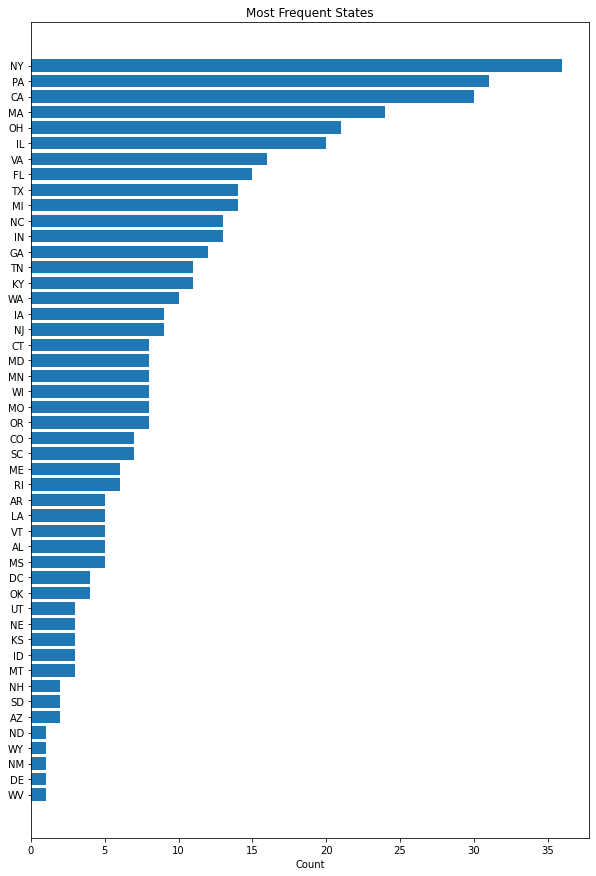

In [15]:
plt.rcParams["figure.figsize"] = (10,15)
state_counts = final.state.value_counts()
plt.barh(state_counts.index[::-1],state_counts[::-1])
plt.title('Most Frequent States'); plt.xlabel('Count')
plt.show()

### Proportion of Private vs. Public Schools
The colleges were sorted by public and private schools and compared against the top 25 colleges. Most of the colleges on the college ranking list are private schools, with the top 25 being all private.

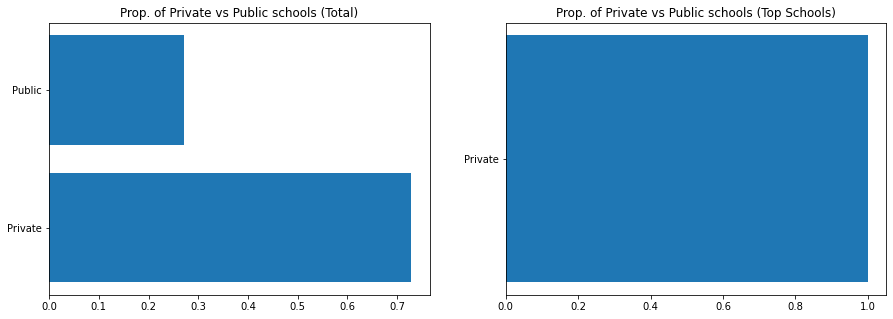

Private    1.0
Name: public_private, dtype: float64

In [16]:
plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(1, 2)
pop_cnt = final.public_private.value_counts(normalize=True)
top_cnt = final.public_private[:25].value_counts(normalize=True)
ax[0].barh(pop_cnt.index, pop_cnt); ax[0].set_title('Prop. of Private vs Public schools (Total)')
ax[1].barh(top_cnt.index, top_cnt); ax[1].set_title('Prop. of Private vs Public schools (Top Schools)')
plt.show()

top_cnt

### Total Cost
We plotted the total cost of each college against its rank to see if there would be a pattern. The higher ranking schools tend to be more expensive than the lower ranking ones.

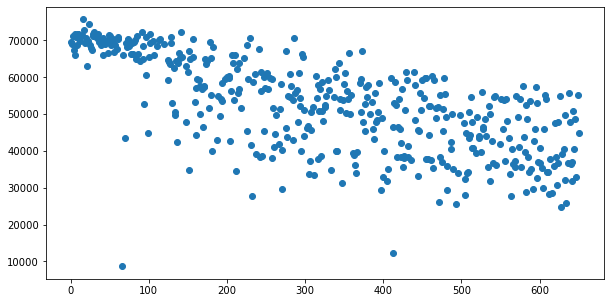

In [17]:
# total cost 
plt.rcParams["figure.figsize"] = (10, 5)
cost = final.set_index('rank', drop=True).total_cost
plt.scatter(cost.index, cost)

### Population
The population of each college was plotted against its rank to see if there would be any correlation.

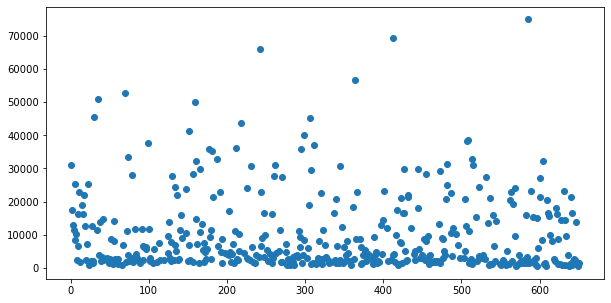

In [18]:
# population 
plt.rcParams["figure.figsize"] = (10, 5)
population = final.set_index('rank', drop=True).student_pop
plt.scatter(population.index, population)

### Undergraduate Population
The population density across all the colleges was plotted to see if there would be a pattern.

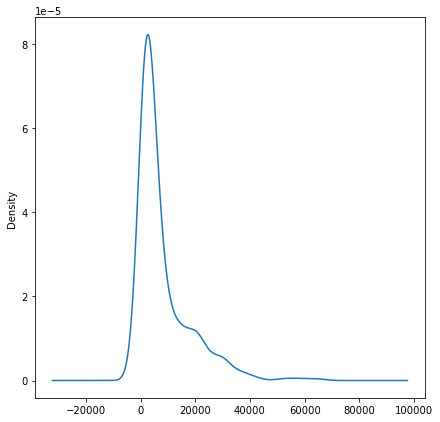

In [19]:
plt.rcParams["figure.figsize"] = (7,7)
final.undergrad_pop.plot(kind='kde')

### ACT and SAT Scores
We compared the middle scores of the ACT and SAT of each college based on the rank. The colleges with the higher rankings tend to require higher ACT and SAT scores.

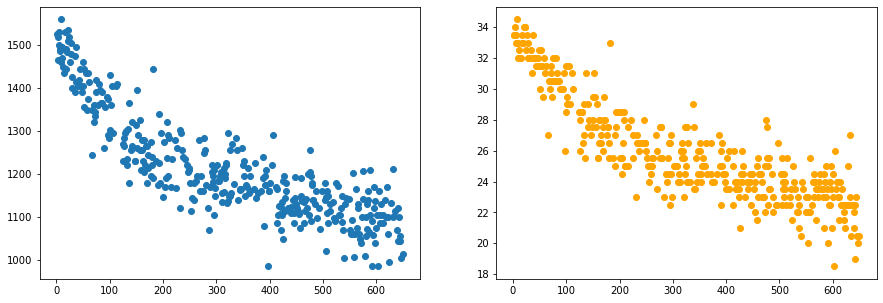

In [20]:
# ACT and SAT scatterplots relative to rank

copy = final.copy().set_index('rank')
sat_middle = (copy.sat_lower + copy.sat_upper) / 2
act_middle = (copy.act_lower + copy.act_upper) / 2

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(1, 2)

ax[0].scatter(sat_middle.index, sat_middle)
ax[1].scatter(act_middle.index, act_middle, color='orange')

In [21]:
final

,rank,name,city,state,public_private,undergrad_pop,student_pop,price,avg_aid,total_cost,acceptance_rate,sat_lower,sat_upper,act_lower,act_upper,total_applicants,total_admissions,undergrad_enrollment,freshman_enrollment,graduate_enrollment,percent_admitted,admissions_yield,total_enrollment,percent_native_american,percent_black,percent_latino,percent_white,percent_multiracial,percent_unknown,percent_nonresident,percent_asian,percent_women,grad_4,grad_5,grad_6
0,1,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,5.0,1460.0,1590.0,32.0,35.0,35023.0,2047.0,10542.0,1659.0,18233.0,6.0,81.0,28297.0,0.0,5.0,7.0,45.0,3.0,5.0,21.0,13.0,49.0,87.0,95.0,97.0
1,2,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,5.0,1390.0,1540.0,32.0,35.0,38828.0,2208.0,7061.0,1674.0,11156.0,6.0,76.0,18346.0,0.0,4.0,10.0,38.0,6.0,6.0,20.0,15.0,43.0,76.0,92.0,96.0
2,3,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,7.0,1460.0,1580.0,32.0,35.0,28977.0,2043.0,5310.0,1300.0,6650.0,7.0,66.0,12109.0,0.0,5.0,7.0,48.0,4.0,3.0,18.0,13.0,49.0,90.0,96.0,98.0
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,7.0,1490.0,1570.0,33.0,35.0,18989.0,1548.0,4528.0,1115.0,6773.0,8.0,72.0,11301.0,0.0,3.0,9.0,34.0,3.0,5.0,29.0,16.0,37.0,84.0,91.0,93.0
4,5,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,6.0,1430.0,1570.0,31.0,35.0,26499.0,1963.0,5248.0,1284.0,2714.0,7.0,65.0,8014.0,0.0,6.0,7.0,45.0,4.0,4.0,20.0,15.0,45.0,88.0,95.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,644,Carson-Newman University,Jefferson City,TN,Private,1934.0,2514.0,18003.0,20126.0,40640.0,67.0,940.0,1150.0,20.0,26.0,3916.0,2607.0,1713.0,481.0,332.0,67.0,18.0,2045.0,0.0,8.0,1.0,79.0,2.0,4.0,5.0,1.0,57.0,37.0,49.0,50.0
440,645,Morehouse College,Atlanta,GA,Private,2202.0,2219.0,34928.0,17318.0,48723.0,74.0,950.0,1160.0,18.0,23.0,2690.0,1798.0,2185.0,488.0,NaN,67.0,27.0,2170.0,0.0,96.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,39.0,51.0,54.0
441,647,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85.0,900.0,1110.0,17.0,23.0,11019.0,9152.0,10268.0,2661.0,2180.0,83.0,29.0,12448.0,0.0,16.0,3.0,67.0,3.0,2.0,7.0,1.0,55.0,22.0,37.0,42.0
442,649,Wells College,Aurora,NY,Private,488.0,516.0,22828.0,30207.0,55180.0,80.0,NaN,NaN,NaN,NaN,2214.0,1321.0,534.0,161.0,NaN,60.0,12.0,534.0,1.0,11.0,8.0,63.0,3.0,8.0,4.0,2.0,66.0,56.0,58.0,58.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10FC07F0>]],
      dtype=object)

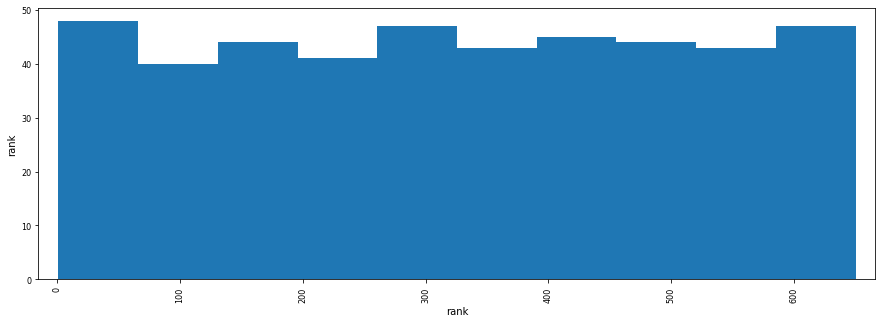

In [22]:
pd.plotting.scatter_matrix(final[['rank',]])

### Demographics
Lastly, we attempted to show at how universities and the real-world population compared to get a better understanding of the diversity/demographics.

In [23]:
demographics = final[['percent_white', 'percent_black', 'percent_asian','percent_latino', 'percent_multiracial','percent_native_american']]
demographics

,percent_white,percent_black,percent_asian,percent_latino,percent_multiracial,percent_native_american
0,45.0,5.0,13.0,7.0,3.0,0.0
1,38.0,4.0,15.0,10.0,6.0,0.0
2,48.0,5.0,13.0,7.0,4.0,0.0
3,34.0,3.0,16.0,9.0,3.0,0.0
4,45.0,6.0,15.0,7.0,4.0,0.0
...,...,...,...,...,...,...
439,79.0,8.0,1.0,1.0,2.0,0.0
440,0.0,96.0,0.0,0.0,0.0,0.0
441,67.0,16.0,1.0,3.0,3.0,0.0
442,63.0,11.0,2.0,8.0,3.0,1.0


In [24]:
stats = {'white':76.3, 'black':13.4, 'native_american':0.2,'latino':18.5,'asian':5.9,'multiracial':2.8 }
stats_df = pd.Series(data = stats)
stats_df

white              76.3
black              13.4
native_american     0.2
latino             18.5
asian               5.9
multiracial         2.8
dtype: float64

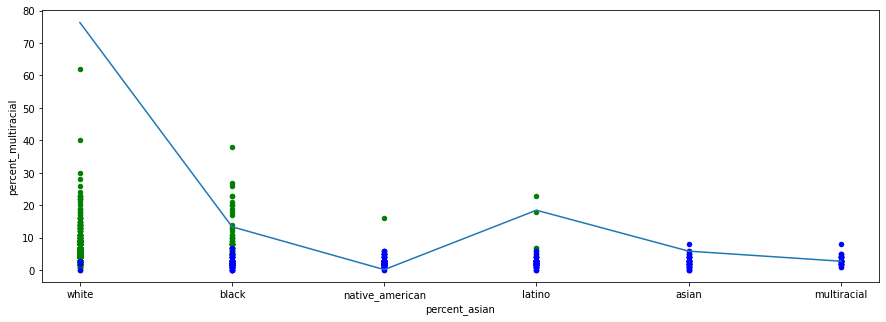

In [25]:
ax1 = demographics.plot(kind='scatter', x='percent_white', y='percent_black', color='r')
ax2 = demographics.plot(kind='scatter', x='percent_native_american', y='percent_latino', color='g', ax=ax1)
ax3 = demographics.plot(kind='scatter', x='percent_asian', y='percent_multiracial', color='b', ax=ax1)
plt.plot(stats_df)